In [3]:
# # If running in google colab:
# from google.colab import drive
# drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [2]:

import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob, Word

In [3]:
# Read in data
data = pd.read_csv('../data/vectors_labels_df.csv')

# # Read in data from Google Colab. Update directory accordingly.
# data = pd.read_csv('/content/drive/MyDrive/Python/vectors_labels_df.csv')

In [4]:
data.head(2)

,Unnamed: 0,screen_name,state,position,name,party,tweet_count,text_concat_clean,liststring,vectors,km_label,dbscan_label
0,0,RepBarragan,CA,Representative,Nanette Diaz Barrag_n,D,4553,"['great', 'welcome', 'SenSanders', 'CA44', 'ra...",'great' 'welcome' 'SenSanders' 'CA44' 'rally' ...,"[-0.19524726380000001, 0.3918217854, 0.0493305...",1,0
1,1,ChrisMurphyCT,CT,Senator,Christopher Murphy,D,8793,"['new', 'apartment', 'new', 'business', 'new',...",'new' 'apartment' 'new' 'business' 'new' 'rest...,"[-0.2074928593, 0.3944523199, 0.0484009482, -0...",0,0


In [5]:
# Using TextBlob to find sentiment score for each politician's doc
# https://stackabuse.com/sentiment-analysis-in-python-with-textblob/
# https://towardsdatascience.com/aspect-based-sentiment-analysis-using-spacy-textblob-4c8de3e0d2b9

data['sentiment'] = [TextBlob(i).sentiment.polarity for i in data['liststring']]

In [6]:
data.head(2)

,Unnamed: 0,screen_name,state,position,name,party,tweet_count,text_concat_clean,liststring,vectors,km_label,dbscan_label,sentiment
0,0,RepBarragan,CA,Representative,Nanette Diaz Barrag_n,D,4553,"['great', 'welcome', 'SenSanders', 'CA44', 'ra...",'great' 'welcome' 'SenSanders' 'CA44' 'rally' ...,"[-0.19524726380000001, 0.3918217854, 0.0493305...",1,0,0.125939
1,1,ChrisMurphyCT,CT,Senator,Christopher Murphy,D,8793,"['new', 'apartment', 'new', 'business', 'new',...",'new' 'apartment' 'new' 'business' 'new' 'rest...,"[-0.2074928593, 0.3944523199, 0.0484009482, -0...",0,0,0.094333


In [7]:
data['sentiment'].describe()

count    623.000000
mean       0.149323
std        0.054367
min       -0.281912
25%        0.112786
50%        0.151760
75%        0.182963
max        0.375344
Name: sentiment, dtype: float64

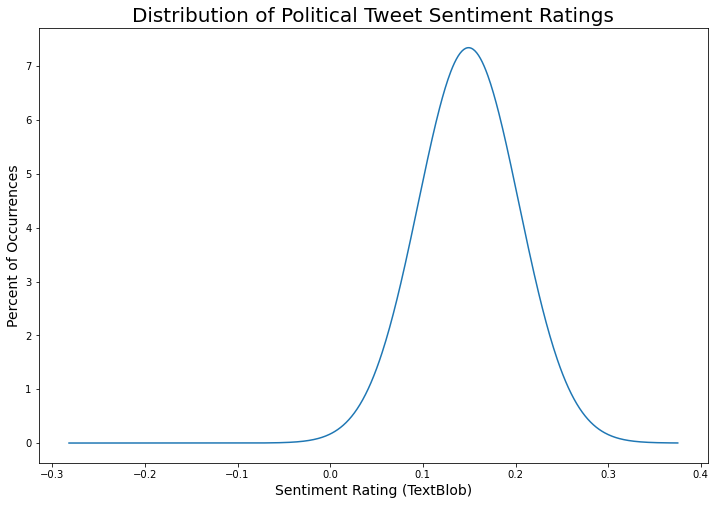

In [15]:
# Plotting a normal curve to see the distribution of tweet document sentiment
# https://www.statology.org/plot-normal-distribution-python/

x = np.arange(np.min(data['sentiment']), np.max(data['sentiment']), .001)

plt.figure(figsize=(12,8))
plt.plot(x, stats.norm.pdf(x, np.mean(data['sentiment']), np.std(data['sentiment'])))
                           
plt.title('Distribution of Political Tweet Sentiment Ratings', fontsize=20)
plt.xlabel('Sentiment Rating', fontsize=14)
plt.ylabel('% of sample', fontsize=14);

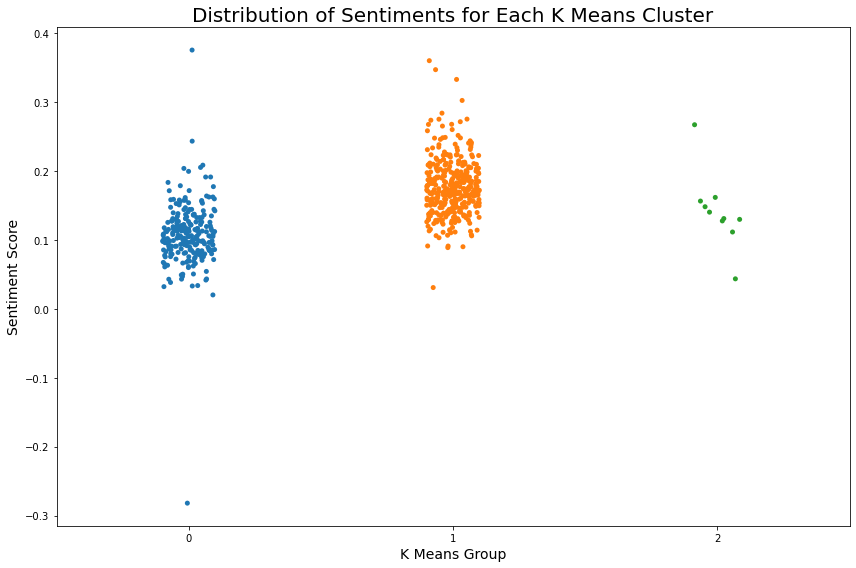

In [22]:
# Examining clusters and the strip plot of their sentiments (K Means)
# https://towardsdatascience.com/how-to-visualize-distributions-2cf2243c7b8e
# https://www.geeksforgeeks.org/stripplot-using-seaborn-in-python/
plt.figure(figsize=(12,8))
    
sns.stripplot(x = data['km_label'], y = data['sentiment'])
plt.title('Distribution of Sentiments for Each K Means Cluster', fontsize=20)
plt.xlabel('K Means Group', fontsize=14)
plt.ylabel('Sentiment Score', fontsize=14);

plt.tight_layout();    

plt.show()

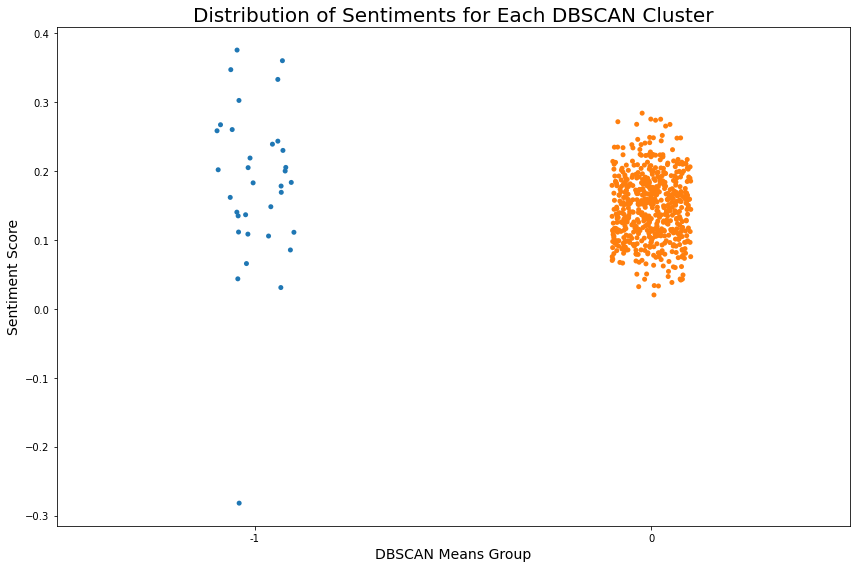

In [23]:
# Examining clusters and the strip plot of their sentiments (DBSCAN)
# https://towardsdatascience.com/how-to-visualize-distributions-2cf2243c7b8e
# https://www.geeksforgeeks.org/stripplot-using-seaborn-in-python/
plt.figure(figsize=(12,8))
    
sns.stripplot(x = data['dbscan_label'], y = data['sentiment'])
plt.title('Distribution of Sentiments for Each DBSCAN Cluster', fontsize=20)
plt.xlabel('DBSCAN Means Group', fontsize=14)
plt.ylabel('Sentiment Score', fontsize=14);

plt.tight_layout();    

plt.show()

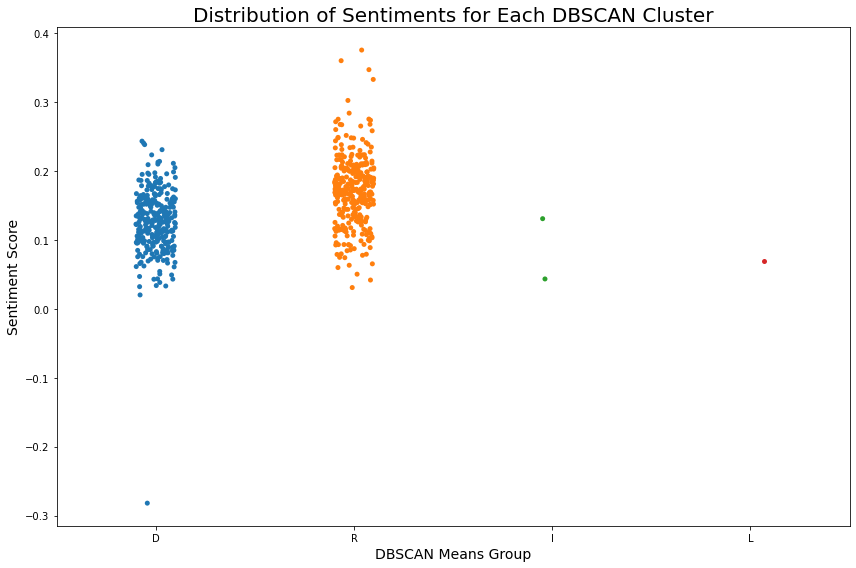

In [24]:
# Examining clusters and the strip plot of their sentiments (DBSCAN)
# https://towardsdatascience.com/how-to-visualize-distributions-2cf2243c7b8e
# https://www.geeksforgeeks.org/stripplot-using-seaborn-in-python/
plt.figure(figsize=(12,8))
    
sns.stripplot(x = data['party'], y = data['sentiment'])
plt.title('Distribution of Sentiments for Each DBSCAN Cluster', fontsize=20)
plt.xlabel('DBSCAN Means Group', fontsize=14)
plt.ylabel('Sentiment Score', fontsize=14);

plt.tight_layout();    

plt.show()

In [26]:
# sorted_df = df_marks.sort_values(by='algebra', ascending=False)

data.sort_values(by='sentiment', ascending=False).head(10)

,Unnamed: 0,screen_name,state,position,name,party,tweet_count,text_concat_clean,liststring,vectors,km_label,dbscan_label,sentiment
440,126,GregForMontana,MT,Representative,Greg Gianforte,R,48,"['thank', 'Montana', 'support', 'inspire', 'co...",'thank' 'Montana' 'support' 'inspire' 'confide...,"[-0.19173346460000001, 0.3998999894, 0.0470632...",0,-1,0.375344
306,149,LamarAlexander,TN,Senator,Lamar Alexander,R,126,"['happy', '222nd', 'Birthday', 'Tennessee', 'T...",'happy' '222nd' 'Birthday' 'Tennessee' 'Tennes...,"[-0.1910900325, 0.4095821083, 0.0506490655, -0...",1,-1,0.359922
430,116,SenThadCochran,MS,Senator,Thad Cochran,R,53,"['thank', 'people', 'Mississippi', 'honor', 'p...",'thank' 'people' 'Mississippi' 'honor' 'privil...,"[-0.1911448985, 0.40951535110000004, 0.0601742...",1,-1,0.346906
442,128,CaptClayHiggins,LA,Representative,Clay Higgins,R,11,"['GregHilburn1', 'RepClayHiggins', 'qualify', ...",'GregHilburn1' 'RepClayHiggins' 'qualify' 'tru...,"[-0.2121082991, 0.3875568509, 0.0570527352, -0...",1,-1,0.332747
422,108,RepJohnDuncanJr,TN,Representative,John Duncan,R,48,"['Ncrye1', 'Neil', 'thank', 'reach', 'excited'...",'Ncrye1' 'Neil' 'thank' 'reach' 'excited' 'wif...,"[-0.1888630241, 0.40576246380000003, 0.0427348...",1,-1,0.302257
596,125,RepJohnRose,TN,Representative,John Rose,R,675,"['statement', 'response', 'George', 'Floyds', ...",'statement' 'response' 'George' 'Floyds' 'deat...,"[-0.1985144317, 0.4078333974, 0.04914271460000...",1,0,0.283828
326,12,RepTomEmmer,MN,Representative,Tom Emmer,R,2098,"['know', 'order', 'flag', 'fly', 'United', 'St...",'know' 'order' 'flag' 'fly' 'United' 'States' ...,"[-0.1949901629, 0.40186434260000004, 0.0427288...",1,0,0.275194
287,130,CongMikeSimpson,ID,Representative,Michael Simpson,R,1195,"['June', 'Alzheimers', 'amp', 'brain', 'Awaren...",'June' 'Alzheimers' 'amp' 'brain' 'Awareness' ...,"[-0.1941247433, 0.39785552020000003, 0.0485355...",1,0,0.275025
267,110,PeteSessions,TX,Representative,Pete Sessions,R,588,"['great', 'discussion', 'North', 'Texas', 'Tol...",'great' 'discussion' 'North' 'Texas' 'Tollway'...,"[-0.202718839, 0.40726250410000003, 0.04944387...",1,0,0.273570
300,143,SenShelby,AL,Senator,Richard Shelby,R,1233,"['today', 'mark', 'start', 'recently', 'announ...",'today' 'mark' 'start' 'recently' 'announce' '...,"[-0.1969716011, 0.4007852062, 0.0619949533, -0...",1,0,0.271377
